In [1]:
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

import os
import sys
import sklearn
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from params import N_STEPS as n_steps
from params import IMAGES_PATH
from ch15_utils_plain import (
    save_fig,
    generate_time_series
)
np.random.seed(42)

# Python ≥3.5 is required
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

%matplotlib inline

# Where to save the figures
os.makedirs(IMAGES_PATH, exist_ok=True)

# 15.3 Forecasting a Time Series

In [2]:
series = generate_time_series(
    ### Generate 10k distinct time series
    batch_size=10000, 
    ### Each 16 time-steps long
    n_steps=n_steps + 1
)
series.shape

(10000, 51, 1)

In [3]:
### 1: Split 70%/20%/10% of these series to training/validation/test sets
### 2: Goal is to predict the 16th value -- y -- given the 1st 15 values in sequence.

### Train
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]

### Valid
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]

### Test
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

print(X_train.shape, y_train.shape,
      "\n---\n",
      X_valid.shape, y_valid.shape,
      "\n---\n",
      X_test.shape, y_test.shape)

(7000, 50, 1) (7000, 1) 
---
 (2000, 50, 1) (2000, 1) 
---
 (1000, 50, 1) (1000, 1)


Saving figure time_series_plot


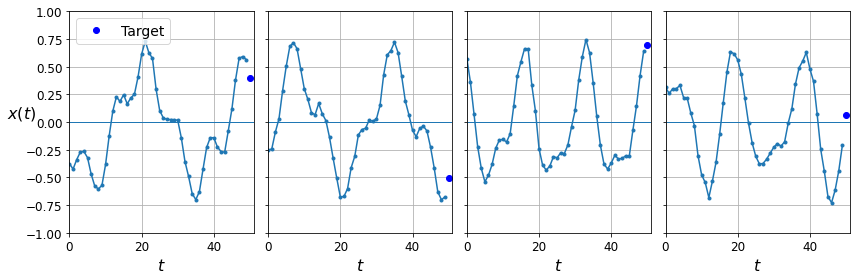

In [4]:
"""Just plot the first four."""

fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    sharey=True,
    figsize=(12, 4)
)

for col in range(4):
    plt.sca(axes[col]
           )
    
    ### Plot training steps
    plt.plot(X_valid[col, :, 0],".-"
            )
    
    ### Plot the predicted step
    plt.plot(n_steps,y_valid[col, 0],"bo",label="Target"
            )
    
    plt.grid(True
            )
    plt.xlabel("$t$", fontsize=16)
    plt.ylabel(("$x(t)$" if col==0 else None),fontsize=16,rotation=0
              )
    
    plt.hlines(0, 0, 100, linewidth=1
              )
    plt.axis([0, n_steps + 1, -1, 1]
            )
    
    if (col==0):### AG's legend boolean
        plt.legend(fontsize=14, loc="upper left"
                  )

save_fig("time_series_plot")
plt.show()